In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("COVID-19-jp/newly_confirmed_cases_daily.csv")
df["Date"] = pd.to_datetime(df["Date"] )
print(len(df))
df.tail()

1044


,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
1039,2022-11-20,77757,5747,902,843,2622,693,1057,1984,2147,...,630,180,2224,501,443,740,546,381,427,262
1040,2022-11-21,42461,3812,536,534,1696,326,624,931,1240,...,283,151,666,163,231,441,343,199,218,156
1041,2022-11-22,121460,11394,1956,2115,3719,1848,2207,3341,1689,...,1251,587,2956,996,859,1555,869,750,681,443
1042,2022-11-23,133361,10943,1606,1820,4439,1583,2041,3191,2487,...,962,525,3609,792,770,1241,940,738,669,558
1043,2022-11-24,60108,4895,673,680,2726,299,661,1355,1194,...,316,174,1339,211,343,418,543,279,284,250


In [3]:
latest_date = df["Date"].max()
latest_date_str = latest_date.strftime("%Y-%m-%d")

In [4]:
df.columns.values

array(['Date', 'ALL', 'Hokkaido', 'Aomori', 'Iwate', 'Miyagi', 'Akita',
       'Yamagata', 'Fukushima', 'Ibaraki', 'Tochigi', 'Gunma', 'Saitama',
       'Chiba', 'Tokyo', 'Kanagawa', 'Niigata', 'Toyama', 'Ishikawa',
       'Fukui', 'Yamanashi', 'Nagano', 'Gifu', 'Shizuoka', 'Aichi', 'Mie',
       'Shiga', 'Kyoto', 'Osaka', 'Hyogo', 'Nara', 'Wakayama', 'Tottori',
       'Shimane', 'Okayama', 'Hiroshima', 'Yamaguchi', 'Tokushima',
       'Kagawa', 'Ehime', 'Kochi', 'Fukuoka', 'Saga', 'Nagasaki',
       'Kumamoto', 'Oita', 'Miyazaki', 'Kagoshima', 'Okinawa'],
      dtype=object)

In [5]:
prefs_h = df.drop("ALL", axis=1)
prefs_h.tail()

,Date,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
1039,2022-11-20,5747,902,843,2622,693,1057,1984,2147,1544,...,630,180,2224,501,443,740,546,381,427,262
1040,2022-11-21,3812,536,534,1696,326,624,931,1240,735,...,283,151,666,163,231,441,343,199,218,156
1041,2022-11-22,11394,1956,2115,3719,1848,2207,3341,1689,2443,...,1251,587,2956,996,859,1555,869,750,681,443
1042,2022-11-23,10943,1606,1820,4439,1583,2041,3191,2487,2692,...,962,525,3609,792,770,1241,940,738,669,558
1043,2022-11-24,4895,673,680,2726,299,661,1355,1194,856,...,316,174,1339,211,343,418,543,279,284,250


In [6]:
prefs_h.set_index(["Date"]).tail()

,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,Gunma,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-11-20,5747,902,843,2622,693,1057,1984,2147,1544,1518,...,630,180,2224,501,443,740,546,381,427,262
2022-11-21,3812,536,534,1696,326,624,931,1240,735,695,...,283,151,666,163,231,441,343,199,218,156
2022-11-22,11394,1956,2115,3719,1848,2207,3341,1689,2443,2678,...,1251,587,2956,996,859,1555,869,750,681,443
2022-11-23,10943,1606,1820,4439,1583,2041,3191,2487,2692,2533,...,962,525,3609,792,770,1241,940,738,669,558
2022-11-24,4895,673,680,2726,299,661,1355,1194,856,1035,...,316,174,1339,211,343,418,543,279,284,250


In [7]:
prefs_h.set_index(["Date"]).stack().tail()

Date                 
2022-11-24  Kumamoto     418
            Oita         543
            Miyazaki     279
            Kagoshima    284
            Okinawa      250
dtype: int64

In [8]:

prefs_h.set_index(["Date"]).stack().reset_index().tail()

,Date,level_1,0
49063,2022-11-24,Kumamoto,418
49064,2022-11-24,Oita,543
49065,2022-11-24,Miyazaki,279
49066,2022-11-24,Kagoshima,284
49067,2022-11-24,Okinawa,250


In [9]:
prefs = prefs_h.set_index(["Date"]).stack().reset_index()
prefs.columns=["Date","Pref","Confirmed"]
prefs.tail()

,Date,Pref,Confirmed
49063,2022-11-24,Kumamoto,418
49064,2022-11-24,Oita,543
49065,2022-11-24,Miyazaki,279
49066,2022-11-24,Kagoshima,284
49067,2022-11-24,Okinawa,250


In [10]:
prefs["Confirmed7DaysMA"] = prefs["Confirmed"].rolling(7).mean()
prefs.tail()

,Date,Pref,Confirmed,Confirmed7DaysMA
49063,2022-11-24,Kumamoto,418,428.857143
49064,2022-11-24,Oita,543,477.714286
49065,2022-11-24,Miyazaki,279,472.428571
49066,2022-11-24,Kagoshima,284,488.142857
49067,2022-11-24,Okinawa,250,332.571429


In [11]:
import datetime
recent_date = pd.to_datetime(datetime.datetime.now()).round("D")- datetime.timedelta(days=90)

## 人口データを付与

In [12]:
pop = pd.read_excel("COVID-19-jp/2001stjin.xls",header=3)[["Unnamed: 1","計"]]
pop.rename(columns={"Unnamed: 1":"都道府県名"},inplace=True)
pop.rename(columns={"計":"人口"},inplace=True)
pop = pop.loc[pop["都道府県名"]!="合計"].reset_index(drop=True)
pop.head()

,都道府県名,人口
0,北海道,5267762
1,青森県,1275783
2,岩手県,1235517
3,宮城県,2292385
4,秋田県,985416


In [13]:
pop["Roman"]=[
 'Hokkaido', 'Aomori', 'Iwate', 'Miyagi', 'Akita',
       'Yamagata', 'Fukushima', 'Ibaraki', 'Tochigi', 'Gunma', 'Saitama',
       'Chiba', 'Tokyo', 'Kanagawa', 'Niigata', 'Toyama', 'Ishikawa',
       'Fukui', 'Yamanashi', 'Nagano', 'Gifu', 'Shizuoka', 'Aichi', 'Mie',
       'Shiga', 'Kyoto', 'Osaka', 'Hyogo', 'Nara', 'Wakayama', 'Tottori',
       'Shimane', 'Okayama', 'Hiroshima', 'Yamaguchi', 'Tokushima',
       'Kagawa', 'Ehime', 'Kochi', 'Fukuoka', 'Saga', 'Nagasaki',
       'Kumamoto', 'Oita', 'Miyazaki', 'Kagoshima', 'Okinawa']
pop

,都道府県名,人口,Roman
0,北海道,5267762,Hokkaido
1,青森県,1275783,Aomori
2,岩手県,1235517,Iwate
3,宮城県,2292385,Miyagi
4,秋田県,985416,Akita
5,山形県,1082296,Yamagata
6,福島県,1881981,Fukushima
7,茨城県,2921436,Ibaraki
8,栃木県,1965516,Tochigi
9,群馬県,1969439,Gunma


In [14]:
prefs = pd.merge(prefs, pop, left_on="Pref", right_on="Roman", how="left")
prefs.head()

,Date,Pref,Confirmed,Confirmed7DaysMA,都道府県名,人口,Roman
0,2020-01-16,Hokkaido,0,NaN,北海道,5267762,Hokkaido
1,2020-01-16,Aomori,0,NaN,青森県,1275783,Aomori
2,2020-01-16,Iwate,0,NaN,岩手県,1235517,Iwate
3,2020-01-16,Miyagi,0,NaN,宮城県,2292385,Miyagi
4,2020-01-16,Akita,0,NaN,秋田県,985416,Akita


In [15]:
# prefs["１万人当たりの感染者数"] = prefs["Confirmed"] / (prefs["人口"] / 10000)
prefs["10万人当たりの新規感染者数"] = prefs["Confirmed"] / (prefs["人口"] / 100000)
# prefs["直近1週間の10万人当たりの感染者数"] = prefs["直近1週間の感染者数"] / (prefs["人口"] / 100000)
prefs = prefs.sort_values(by=["Pref","Date"])
prefs.tail()

,Date,Pref,Confirmed,Confirmed7DaysMA,都道府県名,人口,Roman,10万人当たりの新規感染者数
48851,2022-11-20,Yamanashi,742,2496.714286,山梨県,826579,Yamanashi,89.767584
48898,2022-11-21,Yamanashi,476,1512.000000,山梨県,826579,Yamanashi,57.586752
48945,2022-11-22,Yamanashi,1116,4013.000000,山梨県,826579,Yamanashi,135.014318
48992,2022-11-23,Yamanashi,1226,4236.428571,山梨県,826579,Yamanashi,148.322181
49039,2022-11-24,Yamanashi,575,2011.285714,山梨県,826579,Yamanashi,69.563829


In [16]:
prefs["直近1週間の新規感染者数"]=prefs["Confirmed"].rolling(7).sum()
prefs["直近1週間の10万人当たりの新規感染者数"]=prefs["10万人当たりの新規感染者数"].rolling(7).sum()
prefs["10万人当たりの新規感染者数7日間移動平均"]=prefs["10万人当たりの新規感染者数"].rolling(7).mean()
prefs.tail()

,Date,Pref,Confirmed,Confirmed7DaysMA,都道府県名,人口,Roman,10万人当たりの新規感染者数,直近1週間の新規感染者数,直近1週間の10万人当たりの新規感染者数,10万人当たりの新規感染者数7日間移動平均
48851,2022-11-20,Yamanashi,742,2496.714286,山梨県,826579,Yamanashi,89.767584,5867.0,709.793014,101.399002
48898,2022-11-21,Yamanashi,476,1512.000000,山梨県,826579,Yamanashi,57.586752,5957.0,720.681266,102.954467
48945,2022-11-22,Yamanashi,1116,4013.000000,山梨県,826579,Yamanashi,135.014318,5962.0,721.286169,103.040881
48992,2022-11-23,Yamanashi,1226,4236.428571,山梨県,826579,Yamanashi,148.322181,6198.0,749.837584,107.119655
49039,2022-11-24,Yamanashi,575,2011.285714,山梨県,826579,Yamanashi,69.563829,5930.0,717.414790,102.487827


In [17]:
prefs_recent = prefs.loc[prefs["Date"]>=recent_date]
prefs_latest = prefs.loc[prefs["Date"]==latest_date]

In [18]:
import matplotlib.pyplot as plt
import japanize_matplotlib


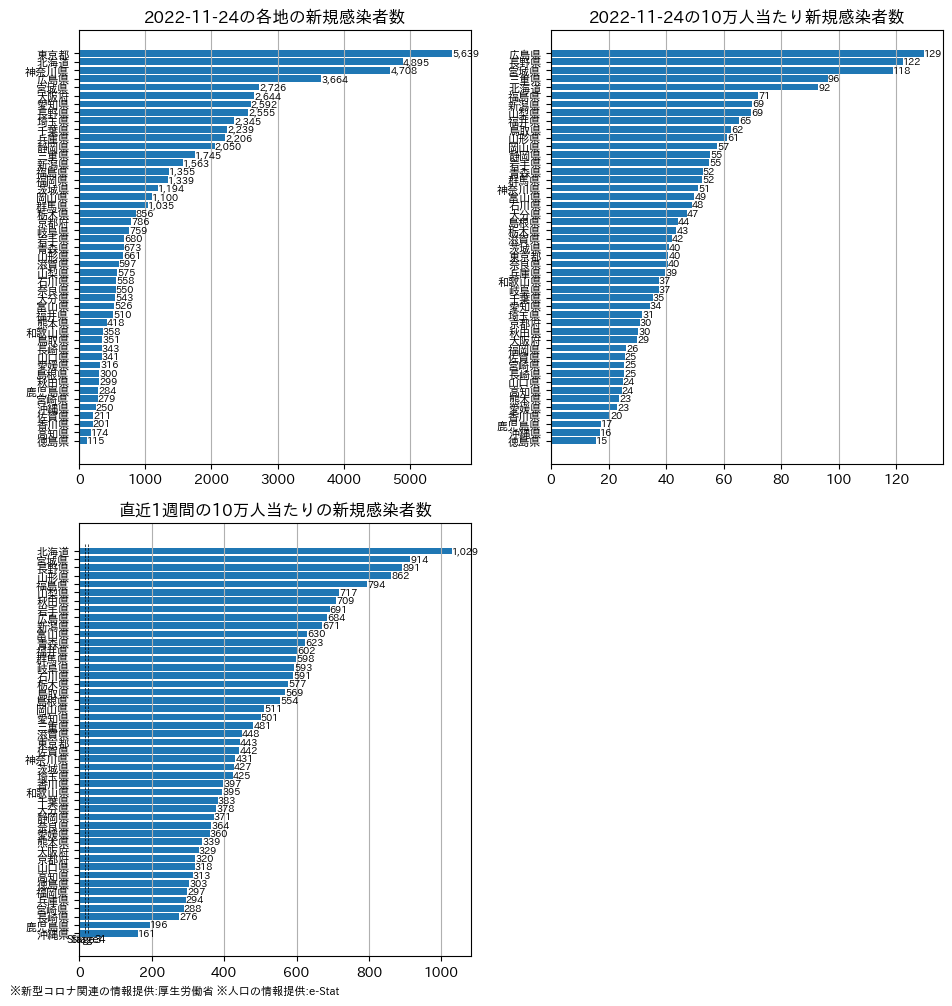

In [19]:
fig = plt.figure(figsize=(9.5,10))

#plt.style.use("ggplot")
### 最新の各地の新規感染者数
plt.subplot(2,2,1) # (rows, columns, panel number)
plt.title("{}の各地の新規感染者数".format(latest_date_str))
chart_data = prefs_latest.sort_values(["Confirmed"])
plt.barh(chart_data["都道府県名"], chart_data["Confirmed"])
for i,v in enumerate(chart_data["Confirmed"]):
    plt.text(v,i,"{:,}".format(v),va="center",fontsize=7)
plt.yticks(fontsize=8)
plt.grid(axis="x")

### 最新の各地の10万人あたり新規感染者数
plt.subplot(2,2,2) # (rows, columns, panel number)
# plt.title("{}の各地の新規死者数".format(latest_date))
plt.title("{}の10万人当たり新規感染者数".format(latest_date_str))
chart_data = prefs_latest.sort_values(["10万人当たりの新規感染者数"])
plt.barh(chart_data["都道府県名"], chart_data["10万人当たりの新規感染者数"])
for i,v in enumerate(chart_data["10万人当たりの新規感染者数"]):
    plt.text(v,i,"{:,}".format(int(v)),va="center",fontsize=7)
plt.yticks(fontsize=8)
plt.grid(axis="x")

### 直近1週間の10万人当たりの新規感染者数
plt.subplot(2,2,3) # (rows, columns, panel number)
plt.title("直近1週間の10万人当たりの新規感染者数")
chart_data = prefs_latest.sort_values(["直近1週間の10万人当たりの新規感染者数"])
plt.barh(chart_data["都道府県名"], chart_data["直近1週間の10万人当たりの新規感染者数"])
for i,v in enumerate(chart_data["直近1週間の10万人当たりの新規感染者数"]):
    plt.text(v,i,"{:,}".format(int(v)),va="center",fontsize=7)
plt.plot([15,15],[0,47],"--",lw=0.5,color="black")
plt.text(15,0,"Stage3",ha="center",va="top",fontsize=8)
plt.plot([25,25],[0,47],"--",lw=0.5,color="black")
plt.text(25,0,"Stage4",ha="center",va="top",fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis="x")

### 新規感染者数の増加速度（新規感染者数前週同曜日比）
# plt.subplot(2,2,4) # (rows, columns, panel number)
# plt.title("新規感染者数前週同曜日比")
# chart_data = all_jp.sort_values("新規感染者数先週比",na_position="first")
# plt.barh(chart_data["都道府県名"], chart_data["新規感染者数先週比"])
# plt.yticks(fontsize=8)
# plt.grid(axis="x")

fig.text(0,0,"※新型コロナ関連の情報提供:厚生労働省 ※人口の情報提供:e-Stat",fontsize=8)
# fig.text(0,0.98,"※{}時点".format(latest_date),fontsize=9,va="top")

fig.tight_layout()

In [20]:
fig.savefig("out/covid-gov-domestic-latest.png",facecolor="white")

In [21]:
prefectures = {
    "東京都": ("-",1.1,""),
#    "沖縄県": ("-",1.1,""),
    "埼玉県": ("-",1.1,""),
    "千葉県": ("-",1.1,""),
    "神奈川県": ("-",1.1,""),
#    "栃木県": ("-",1.1,""),
#    "茨城県": ("-",1.1,""),
#    "群馬県": ("-",1.1,""),
#    "静岡県": ("-",1.1,""),
    "京都府": ("-",1.1,""),
    "大阪府": ("-",1.1,""),
    "兵庫県": ("-",1.1,""),
#    "福岡県": ("-",1.1,""),
#    "北海道": ("--",1.0,"2021-05-25"),
#    "石川県": ("--",1.0,""),
#    "福島県": ("--",1.0,""),
#    "愛知県": ("--",1.0,"2021-05-25"),
#    "滋賀県": ("--",1.0,""),
#    "熊本県": ("--",1.0,""),
#    "広島県": ("--",1.0,"2021-04-15"),
#    "岐阜県": ("--",1.0,"2021-05-16"),
#    "三重県": ("--",1.0,"2021-05-27"),
#    "山梨県": (":",1.0,""),
#    "佐賀県": (":",1.5,""),
#    "奈良県": (":",1.5,""),
#    "山口県": (":",1.5,""),
#    "高知県": (":",1.5,""),
#    "青森県": (":",1.5,""),
#    "富山県": (":",1.5,""),
#    "岩手県": (":",1.5,""),
#    "島根県": (":",1.5,""),
}

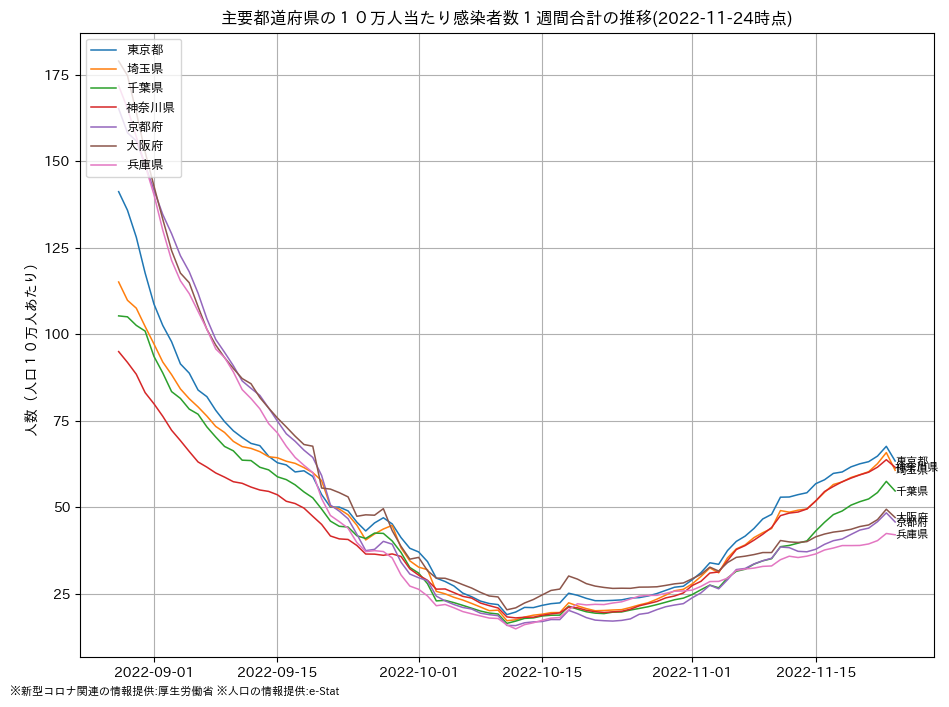

In [22]:
fig = plt.figure(figsize=(9.5,7))
plt.title("主要都道府県の１０万人当たり感染者数１週間合計の推移({}時点)".format(latest_date_str))
dates = prefs_recent["Date"].unique()
for p in prefectures:
    values = prefs_recent.loc[prefs_recent["都道府県名"]==p]["10万人当たりの新規感染者数7日間移動平均"]
    plt.plot_date(dates,values,label=p, fmt=prefectures[p][0], lw=prefectures[p][1])
    if prefectures[p][2] == "":
        text_date = dates.max()
    else:
        text_date = pd.to_datetime(prefectures[p][2])
    text_y = prefs_recent.loc[(prefs_recent["都道府県名"]==p) & (prefs_recent["Date"]==text_date)]["10万人当たりの新規感染者数7日間移動平均"]
    plt.text(text_date,text_y,p,fontsize=8,va="center")
# plt.plot([dates.min(),dates.max()],[15,15],"-",lw=1.5,color="black")
# plt.text(dates.min(),15,"Stage3",ha="right",va="center",fontsize=9)
# plt.plot([dates.min(),dates.max()],[25,25],"-",lw=1.5,color="black")
# plt.text(dates.min(),25,"Stage4",ha="right",va="center",fontsize=9)
plt.grid()
plt.legend(bbox_to_anchor=(0, 1),loc='upper left', fontsize=9)
plt.ylabel("人数（人口１０万人あたり）")
fig.text(0,0,"※新型コロナ関連の情報提供:厚生労働省 ※人口の情報提供:e-Stat",fontsize=8)

plt.tight_layout()

In [23]:
fig.savefig("out/covid-gov-domestic-major-pref-daily-recent.png",facecolor="white")